# Data analysis of the Kaggle Titanic Dataset

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### First, we need to load the dataset from our directory.

In [26]:
df = pd.read_csv('data/train.csv')

### Now that we have the data load it, let's get some basic info on it.

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- df.head() displays the first few rows of the dataset, giving an overview of its structure.
- df.info() provides a summary of the data, including each column's data type, and the value of non-null values
- df.describe() gives us useful statistics for numerical columns
- df.isnull().sum() shows the number of missing values for each column

In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### We can see that we are missing the ages of 177 passengers, 687 cabin numbers, which is a majority, and two passengers' embark ports.

In [31]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.dropna(subset=['Embarked'], inplace=True)

### For simplicity, I will be dropping the Embarked column as it most likely has nothing to do with the survival rate.
### also going to be filling the age with the median, for data consistency.

---

### First, let's see the class distribution of passengers.

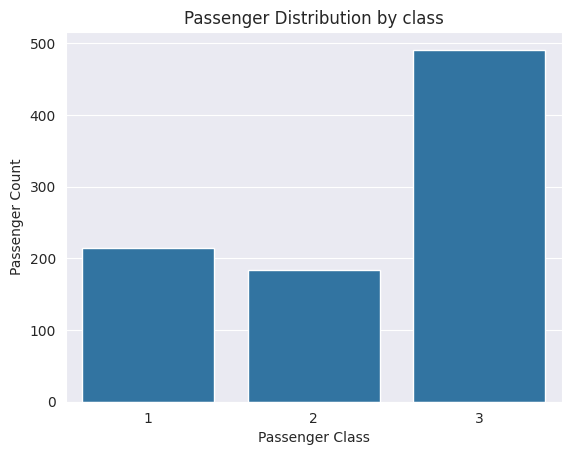

In [32]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Distribution by class')
plt.ylabel('Passenger Count')
plt.xlabel('Passenger Class')
plt.show()

- This plot shows the distribution of passengers across different classes.
- The x-axis represents the passenger class
- The y-axis represents the number of passengers
- From this graph we can see that the majority of the passengers were in the 3rd class.

---

### Let's visualize the survival rate based on the passenger class

Text(0, 0.5, 'Survival Rate')

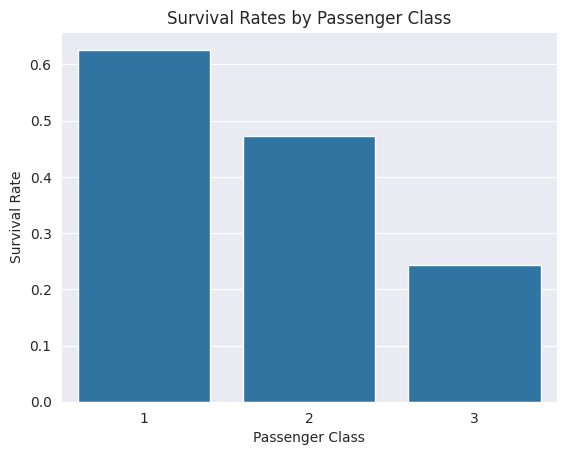

In [33]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

- This bar plot shows the average survival rate of passengers based on their passenger class
- The x-axis represents the passenger Class (1st, 2nd, 3rd)
- The y-axis represents the Survival Rate
- We can see that:
    - Passengers in the 1st class had a higher rate than those in the classes below them.
    - Passengers in the 3rd class had the lowest survival rate.

---

### Now let's see the survival rate based on gender.

Text(0.5, 1.0, 'Survival Rates by Gender')

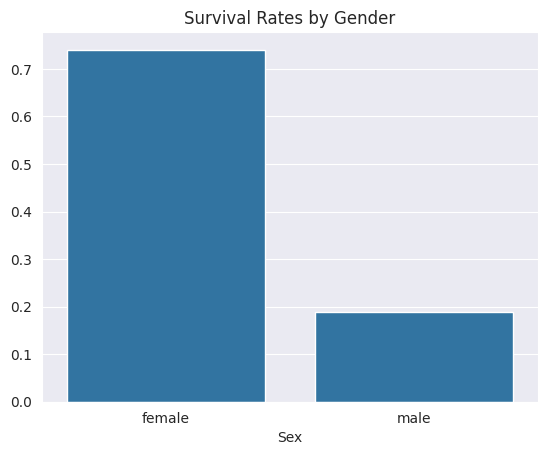

In [34]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title('Survival Rates by Gender')

- This bar plot shows the average survival rate based on the gender of the passenger.
- The x-axis represents the Sex/Gender
- The y-axis represents the Survival Rate.
- We can see that female passengers had a much higher survival rate, most likely because of the rule "Women and children first!"

---

### Visualization of the distribution of embarkment points.

Text(0.5, 1.0, 'Embarked Distribution')

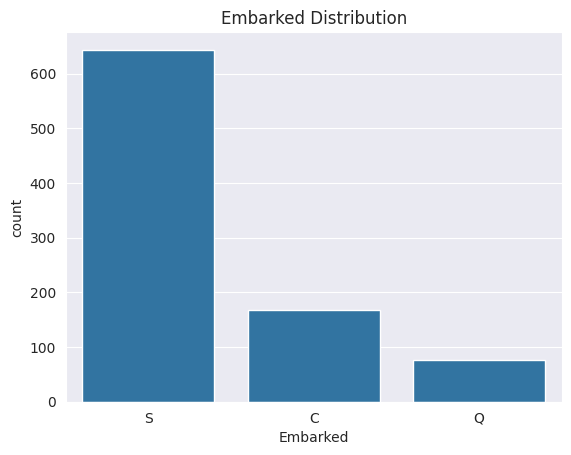

In [35]:
embarked_counts = df['Embarked'].value_counts()
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Distribution')

- Distribution of embarkation points (Southampton, Cherbourg and Queenstown)
- We can see that approx. 70% of the passengers embarked in Southampton, and the rest are divided by Cherbourg and Queenstown.

---

### Let's look at the distribution of fare prices to wrap this up.

Text(0, 0.5, 'Passenger Count')

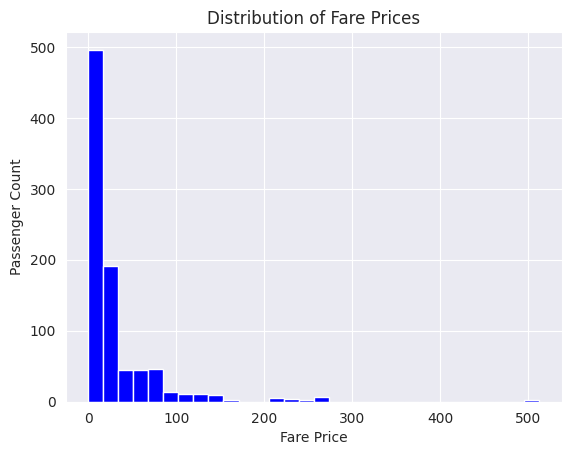

In [36]:
df['Fare'].hist(bins=30, color = 'blue')
plt.title('Distribution of Fare Prices')
plt.xlabel('Fare Price')
plt.ylabel('Passenger Count')

- This histogram shows the Fare Price distribution amongst passengers.
- The x-axis is the Fare Price.
- The y-axis is the number of passengers who paid each fare price.
- Notable observations:
    - Most fares were between \\$0 and \\$50
    - Only a small number of passengers paid fares over $50